## Accessing NOAA Multi-Radar Multi-Sensor (MRMS) Quantitative Precipitation Estimation (QPE) with the Planetary Computer STAC API

The NOAA [Multi-Radar Multi-Sensor (MRMS) Quantitative Precipitation Estimation (QPE)](https://www.nssl.noaa.gov/projects/mrms/) products are seamless 1 km mosaics of precipitation accumulation covering the contiguous United States, Alaska, Hawaii, the Caribbean, and Guam. The products are automatically generated through integration of data from multiple radars and radar networks, surface and satellite observations, numerical weather prediction (NWP) models, and climatology. The products are updated hourly at the top of the hour.

MRMS QPE is available as a "Pass 1" or "Pass 2" product. The Pass 1 product is available with a 60 minute latency and includes 60-65% of gauges. The Pass 2 product has a higher latency of 120 minutes and includes 99% of gauges. The Pass 1 and Pass 2 products are broken into 1-, 3-, 6-, 12-, 24-, 48-, and 72-hour accumulation sub-products.

The Planetary Computer hosts the following NOAA MRMS QPE products: 
- 1-Hour Pass 1 
- 1-Hour Pass 2
- 24-Hour Pass 2

Additional documentation for this dataset is available at the [Planetary Computer Data Catalog](https://planetarycomputer.microsoft.com/dataset/group/noaa-mrms-qpe). In this notebook, we'll demonstrate how to access and work with the NOAA MRMS QPE 24-Hour Pass 2 product.

### Data Access
This notebook works with or without an API key, but you will be given more permissive access to the data with an API key. The [Planetary Computer Hub](https://planetarycomputer.microsoft.com/compute) sets the environment variable "PC_SDK_SUBSCRIPTION_KEY" when your server is started. When your Planetary Computer [account request](https://planetarycomputer.microsoft.com/account/request) was approved, a pair of subscription keys were automatically generated for you. You can view your keys by singing in to the [developer portal](https://planetarycomputer.developer.azure-api.net/). The API key may be set manually via the following code:

```python
pc.settings.set_subscription_key(<YOUR API Key>)
```

The datasets hosted by the Planetary Computer are available from [Azure Blob Storage](https://docs.microsoft.com/en-us/azure/storage/blobs/). We'll use [pystac-client](https://pystac-client.readthedocs.io/) to search the Planetary Computer's [STAC API](https://planetarycomputer.microsoft.com/api/stac/v1/docs) for the subset of the data that we care about, and then we'll load the data directly from Azure Blob Storage. We'll specify a `modifier` so that we can access the data stored in the Planetary Computer's private Blob Storage Containers. See [Reading from the STAC API](https://planetarycomputer.microsoft.com/docs/quickstarts/reading-stac/) and [Using tokens for data access](https://planetarycomputer.microsoft.com/docs/concepts/sas/) for more. 

In [1]:
import odc.stac
import planetary_computer
import pystac_client
import rich.table

# Open the Planetary Computer STAC API
catalog = pystac_client.Client.open(
    "https://planetarycomputer-staging.microsoft.com/api/stac/v1/",
    modifier=planetary_computer.sign_inplace,
)

The NOAA MRMS QPE products may be queried by several regions (i.e. query by key "ALASKA", "CARIB", "CONUS", "GUAM", or "HAWAII").

In [2]:
# Fetch the collection of interest and display available items
search = catalog.search(
    collections="noaa-mrms-qpe-24h-pass2",
    datetime="2022-07-23T01:00:00Z",
    query={"noaa_mrms_qpe:region": {"eq": "CONUS"}},
)
items = list(search.get_items())
items

[<Item id=CONUS_MRMS_MultiSensor_QPE_24H_Pass2_00.00_20220723-010000>]

### Available Assets

Let's display the available assets and metadata for the NOAA MRMS QPE 24-Hour Pass 2 product. 

In [3]:
# Assets
t = rich.table.Table("Key", "Value")
for key, asset in items[0].assets.items():
    t.add_row(key, asset.title)
t

┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Key              ┃ Value                                  ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ cog              │ Processed Cloud Optimized GeoTIFF file │
│ grib2            │ Original GRIB2 file                    │
│ tilejson         │ TileJSON with default rendering        │
│ rendered_preview │ Rendered preview                       │
└──────────────────┴────────────────────────────────────────┘

In [4]:
# Metadata
t = rich.table.Table("Key", "Value")
for k, v in sorted(items[0].properties.items()):
    t.add_row(k, str(v))
t

┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Key                  ┃ Value                                                                                    ┃
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ datetime             │ 2022-07-23T01:00:00Z                                                                     │
│ description          │ Multi-sensor accumulation 24-hour (2-hour latency)                                       │
│ noaa_mrms_qpe:pass   │ 2                                                                                        │
│ noaa_mrms_qpe:period │ 24                                                                                       │
│ noaa_mrms_qpe:region │ CONUS                                                                                    │
│ proj:epsg            │ None                                                                                     │
│ proj:projjson        │ {'name': 'unknown', 'type': 'GeographicCRS', 'datum': {'name': 'unknown', 'type':        │
│                      │ 'GeodeticReferenceFrame', 'ellipsoid': {'name': 'unknown', 'semi_major_axis': 6378160,   │
│                      │ 'inverse_flattening': 298.253916296469}}, '$schema':                                     │
│                      │ 'https://proj.org/schemas/v0.4/projjson.schema.json', 'coordinate_system': {'axis':      │
│                      │ [{'name': 'Longitude', 'unit': 'degree', 'direction': 'east', 'abbreviation': 'lon'},    │
│                      │ {'name': 'Latitude', 'unit': 'degree', 'direction': 'north', 'abbreviation': 'lat'}],    │
│                      │ 'subtype': 'ellipsoidal'}}                                                               │
└──────────────────────┴──────────────────────────────────────────────────────────────────────────────────────────┘

### Loading the dataset
Now let's load STAC items into an xarray dataset using [odc-stac](https://github.com/opendatacube/odc-stac). Location coordinates are centered to CONUS at 39.50°N and 98.35°W. 

In [5]:
latitude = 39.50
longitude = -98.35
buffer = 35
bbox = [longitude - buffer, latitude - buffer, longitude + buffer, latitude + buffer]

# Load STAC items into an xarray dataset
ds = odc.stac.load(
    items,
    crs="EPSG:4326",
    resolution=0.1,
    bbox=bbox,
)
ds

<xarray.Dataset>
Dimensions:      (latitude: 700, longitude: 701, time: 1)
Coordinates:
  * latitude     (latitude) float64 74.45 74.35 74.25 74.15 ... 4.75 4.65 4.55
  * longitude    (longitude) float64 -133.3 -133.2 -133.2 ... -63.45 -63.35
    spatial_ref  int32 4326
  * time         (time) datetime64[ns] 2022-07-23T01:00:00
Data variables:
    cog          (time, latitude, longitude) float64 nan nan nan ... nan nan nan

### Displaying the data

Let's display the NOAA MRMS QPE 24-Hour Pass 2 product on July 23, 2022 over CONUS. 

In [6]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt

In [7]:
# Remove precipitation data equal to 0mm for data visualization
ds = ds.where(ds > 0, drop=True)
ds

<xarray.Dataset>
Dimensions:      (time: 1, latitude: 350, longitude: 658)
Coordinates:
  * latitude     (latitude) float64 54.95 54.85 54.75 ... 20.25 20.15 20.05
  * longitude    (longitude) float64 -129.9 -129.8 -129.8 ... -63.45 -63.35
    spatial_ref  int32 4326
  * time         (time) datetime64[ns] 2022-07-23T01:00:00
Data variables:
    cog          (time, latitude, longitude) float64 nan nan nan ... nan nan nan

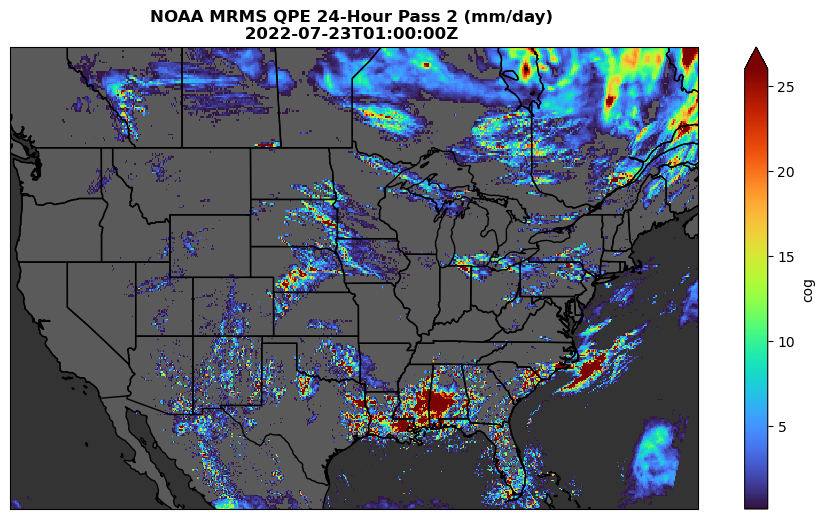

In [8]:
# Data visualization
extent = [-125, -65, 24, 50.5]
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Mercator())

ds.cog.plot(
    ax=ax,
    cmap="turbo",
    transform=ccrs.PlateCarree(),
    vmax=26,
    vmin=0.1,
)

ax.set_extent(extent)
ax.add_feature(cfeature.OCEAN, zorder=0, linewidth=0, facecolor="#333333")
ax.add_feature(cfeature.LAND, zorder=0, linewidth=0, facecolor="#5A5A5A")
ax.add_feature(cfeature.STATES, linewidth=1)
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.set_title(
    "NOAA MRMS QPE 24-Hour Pass 2 (mm/day) \n 2022-07-23T01:00:00Z  ", fontweight="bold"
);